In [1]:
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [22]:
file_in = '/mnt/Data/Data/IMERG/season/summer/IMERG_2001_01_2020_12_24h_05x05_summer.nc'
data = ca.read_netcdf(file_in,0)
lat = data['lat']
lon = data['lon']
lon2d, lat2d = np.meshgrid(lon, lat)
tim1 = data['time']
pre_new = data['pre']
mean_new = np.mean(pre_new,axis=0)
pre_new.shape

(1805, 120, 110)

In [27]:
file_in = '/mnt/Data/Data/IMERG/season/summer/IMERG_2001_01_2021_12_24h_05x05_summer_old.nc'
data = ca.read_netcdf(file_in,0)
lat = data['lat']
lon = data['lon']
lon2d2, lat2d2 = np.meshgrid(lon, lat)
tim2 = data['time'][0:1805]
pre_old = data['prec'][0:1805,:,:]
mean_old = np.mean(pre_old,axis=0)
pre_old.shape

(1805, 110, 110)

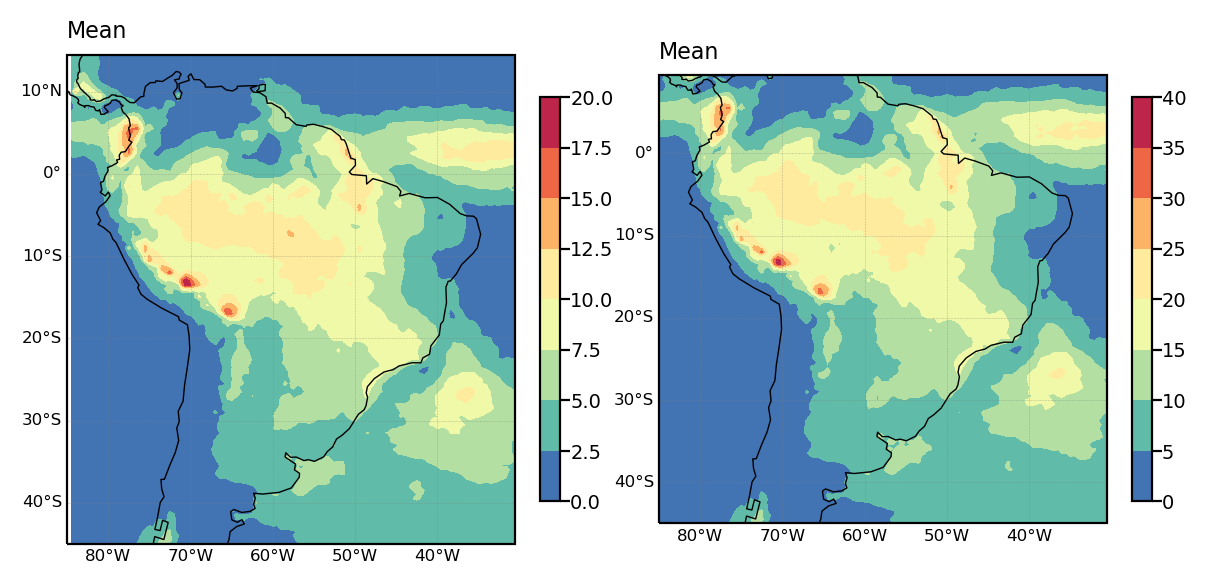

In [32]:
proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
levels = np.arange(0,30,2)
levels = None

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,mean_new,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d2, lat2d2,mean_old,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)